In [29]:
import os

import numpy as np
import pandas as pd
import astropy
import astroML
from astroML.time_series import lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Analyze photometry for APF-50 sample, and look for evidence of rotation or other short-timescale activity.

## Load photometry for one star, inspect.

In [31]:
dirs = ['APF-APT-50', 'APF-APT-50.2', 'APF-APT-50.3', 'APF-APT-50.4']
phot = pd.read_csv(dirs[0]+'/hd1461/d-ac.by', sep='  ', 
                   names=['time', 'flux'], header=None)

/Users/lee/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
phot

,time,flux
0,51077.7657,-0.93560
1,51079.7593,-0.94050
2,51079.8976,-0.93950
3,51080.7516,-0.93955
4,51081.7517,-0.93845
5,51081.8983,-0.94105
6,51082.7508,-0.93865
7,51083.7443,-0.93790
8,51085.7428,-0.93705
9,51085.8816,-0.93755


In [30]:
np.std(phot.flux)

0.0014365307405472608

In [60]:
omega = 2*np.pi*np.linspace(0.0001, 0.5, 100000)
err = 0.00005*np.ones(len(phot))
L = lomb_scargle(phot.time, phot.flux, err, omega, generalized=True)

        Use astropy.stats.LombScargle instead. [__main__]


In [61]:
L

array([5.70073670e-05, 5.20955803e-05, 4.70808798e-05, ...,
       3.03598903e-03, 3.91115800e-03, 4.71014582e-03])

Text(0, 0.5, 'Power')

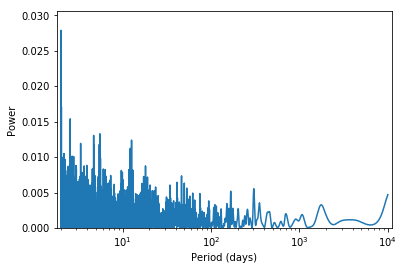

In [66]:
pers = 2*np.pi/omega
fig, ax = plt.subplots()
ax.plot(pers, np.flip(L))
ax.set_xlim([0.9*pers[-1], 1.1*pers[0]])
ax.set_ylim([0, 1.1*np.amax(L)])
ax.set_xscale('log')
ax.set_xlabel('Period (days)')
ax.set_ylabel('Power')